In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
from process import *
from sklearn.preprocessing import LabelBinarizer
import h5py
from keras.utils import np_utils, to_categorical
from keras.models import model_from_json
import csv

/home/afadinsro/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
season = []
all_seasons = []

try:
    for i in range(1, 27):
        if i not in range(9, 16):
            with open('data/E0 ({}).csv'.format(i), mode='r', encoding='iso-8859-1') as f:
                reader = csv.reader((line.replace('\0','') for line in f))
                for row in reader:
                    season.append(row[:26])

# all_seasons.append(season)
except csv.Error:
    print('null byte')
data = pd.DataFrame(np.array(season))

In [8]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,12,9,4,0,1,0,0,1.53,4.5,6.5
2,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,9,3,10,0,2,0,0,11,5.5,1.33
3,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,11,8,5,3,3,2,0,1.25,6.5,15
4,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,19,12,9,1,3,0,0,1.83,3.6,5
5,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,10,6,7,1,1,0,0,1.7,3.8,5.75
6,E0,12/08/17,Southampton,Swansea,0,0,D,0,0,D,...,13,13,0,2,1,0,0,1.62,4,6.5
7,E0,12/08/17,Watford,Liverpool,3,3,D,2,1,H,...,8,3,3,0,3,0,0,6,4.2,1.62
8,E0,12/08/17,West Brom,Bournemouth,1,0,H,1,0,H,...,3,8,2,3,1,0,0,2.4,3.3,3.3
9,E0,13/08/17,Man United,West Ham,4,0,H,1,0,H,...,7,11,1,2,2,0,0,1.3,5.75,12


In [3]:
fixtures = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        record = np.empty(15, dtype=object)
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            row = row.tolist()
            record[0] = row[1].split('/')[1]
            if row[2] == 'Liverpool':
                record[1] = 1
                    
            elif row[3] == 'Liverpool':
                record[1] = 0
            
            if row[9] == 'A':
                record[4] = 0
            elif row[9] == 'B':
                record[4] = 1
            else:
                record[4] = 2
                
            record[2] = row[7]
            record[3] = row[8]
            record[5] = row[23]
            record[6] = row[24]
            record[7] = row[25]
            
            # y's
            record[8] = row[4]
            record[9] = row[5]
            record[10] = row[17]
            record[11] = row[18]
            record[12] = row[19]
            record[13] = row[20]
            record[14] = row[6] # full time results
            
            fixtures.append(record)
            
            
    x += 10
    size += 10

fixtures = pd.DataFrame(fixtures)
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,2,1,2,6,4.2,1.62,3,3,3,3,0,3,D
1,08,1,0,0,2,1.36,5.25,9.5,1,0,4,2,1,3,H
2,08,1,2,0,2,2.15,3.7,3.5,4,0,4,3,2,4,H
3,09,0,2,0,2,1.85,4,4.2,5,0,8,3,2,2,H
4,09,1,1,1,2,1.29,6,13,1,1,12,2,1,2,D
5,09,0,1,2,0,4.1,3.9,1.91,2,3,3,6,3,3,A
6,10,0,1,1,2,5,3.8,1.67,1,1,1,5,1,1,D
7,10,1,0,0,2,2.8,3.25,2.8,0,0,7,3,0,2,D
8,10,0,3,1,2,2.25,3.5,3.39,4,1,3,5,0,1,H
9,10,1,0,0,2,1.25,6.75,13,3,0,9,2,0,1,H


In [5]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,2,1,2,6,4.2,1.62,3,3,3,3,0,3,D
1,08,1,0,0,2,1.36,5.25,9.5,1,0,4,2,1,3,H
2,08,1,2,0,2,2.15,3.7,3.5,4,0,4,3,2,4,H
3,09,0,2,0,2,1.85,4,4.2,5,0,8,3,2,2,H
4,09,1,1,1,2,1.29,6,13,1,1,12,2,1,2,D
5,09,0,1,2,0,4.1,3.9,1.91,2,3,3,6,3,3,A
6,10,0,1,1,2,5,3.8,1.67,1,1,1,5,1,1,D
7,10,1,0,0,2,2.8,3.25,2.8,0,0,7,3,0,2,D
8,10,0,3,1,2,2.25,3.5,3.39,4,1,3,5,0,1,H
9,10,1,0,0,2,1.25,6.75,13,3,0,9,2,0,1,H


In [6]:
#model without half time statistics

In [14]:
X = fixtures[[0,1,4,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[14]]

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y.ix[:600,])
Ytrain = to_categorical(integer_encoded, num_classes=3)
# yt = to_categorical(Y.ix[:600,])
# print(yt.shape)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest_without_halftime = X.ix[600:,]
test_int_encoded = label_encoder.fit_transform(Y.ix[600:,])
Ytest_without_halftime = to_categorical(test_int_encoded, num_classes=3)

/home/afadinsro/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/afadinsro/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/afadinsro/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
without_half_time_details_FTR_model = Sequential()
without_half_time_details_FTR_model.add(Dense(200, input_dim=5, activation='relu'))
without_half_time_details_FTR_model.add(Dense(500, activation='relu'))
without_half_time_details_FTR_model.add(Dense(500, activation='sigmoid'))
without_half_time_details_FTR_model.add(Dense(3, activation='softmax'))
without_half_time_details_FTR_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
without_half_time_details_history = without_half_time_details_FTR_model.fit(Xtrain, Ytrain, epochs=2500, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/2500
 - 0s - loss: 1.1252 - acc: 0.3452 - val_loss: 1.0528 - val_acc: 0.5193
Epoch 2/2500
 - 0s - loss: 1.0891 - acc: 0.4619 - val_loss: 1.0431 - val_acc: 0.5193
Epoch 3/2500
 - 0s - loss: 1.0756 - acc: 0.4619 - val_loss: 1.0406 - val_acc: 0.5193
Epoch 4/2500
 - 0s - loss: 1.0699 - acc: 0.4619 - val_loss: 1.0403 - val_acc: 0.5193
Epoch 5/2500
 - 0s - loss: 1.0673 - acc: 0.4619 - val_loss: 1.0407 - val_acc: 0.5193
Epoch 6/2500
 - 0s - loss: 1.0661 - acc: 0.4619 - val_loss: 1.0411 - val_acc: 0.5193
Epoch 7/2500
 - 0s - loss: 1.0655 - acc: 0.4619 - val_loss: 1.0415 - val_acc: 0.5193
Epoch 8/2500
 - 0s - loss: 1.0651 - acc: 0.4619 - val_loss: 1.0416 - val_acc: 0.5193
Epoch 9/2500
 - 0s - loss: 1.0649 - acc: 0.4619 - val_loss: 1.0417 - val_acc: 0.5193
Epoch 10/2500
 - 0s - loss: 1.0647 - acc: 0.4619 - val_loss: 1.0417 - val_acc: 0.5193
Epoch 11/2500
 - 0s - loss: 1.0645 - acc: 0.4619 - val_loss: 1.0416 - val_acc: 0.5193
Epoch 12/2500
 - 

Epoch 96/2500
 - 0s - loss: 1.0517 - acc: 0.4619 - val_loss: 1.0279 - val_acc: 0.5193
Epoch 97/2500
 - 0s - loss: 1.0515 - acc: 0.4619 - val_loss: 1.0278 - val_acc: 0.5193
Epoch 98/2500
 - 0s - loss: 1.0514 - acc: 0.4619 - val_loss: 1.0276 - val_acc: 0.5193
Epoch 99/2500
 - 0s - loss: 1.0512 - acc: 0.4619 - val_loss: 1.0274 - val_acc: 0.5193
Epoch 100/2500
 - 0s - loss: 1.0511 - acc: 0.4619 - val_loss: 1.0273 - val_acc: 0.5193
Epoch 101/2500
 - 0s - loss: 1.0509 - acc: 0.4619 - val_loss: 1.0271 - val_acc: 0.5193
Epoch 102/2500
 - 0s - loss: 1.0508 - acc: 0.4619 - val_loss: 1.0270 - val_acc: 0.5193
Epoch 103/2500
 - 0s - loss: 1.0507 - acc: 0.4619 - val_loss: 1.0268 - val_acc: 0.5193
Epoch 104/2500
 - 0s - loss: 1.0505 - acc: 0.4619 - val_loss: 1.0266 - val_acc: 0.5193
Epoch 105/2500
 - 0s - loss: 1.0504 - acc: 0.4619 - val_loss: 1.0265 - val_acc: 0.5193
Epoch 106/2500
 - 0s - loss: 1.0502 - acc: 0.4619 - val_loss: 1.0263 - val_acc: 0.5193
Epoch 107/2500
 - 0s - loss: 1.0501 - acc: 0.46

Epoch 191/2500
 - 0s - loss: 1.0378 - acc: 0.4619 - val_loss: 1.0127 - val_acc: 0.5193
Epoch 192/2500
 - 0s - loss: 1.0376 - acc: 0.4619 - val_loss: 1.0125 - val_acc: 0.5193
Epoch 193/2500
 - 0s - loss: 1.0375 - acc: 0.4619 - val_loss: 1.0124 - val_acc: 0.5193
Epoch 194/2500
 - 0s - loss: 1.0373 - acc: 0.4619 - val_loss: 1.0122 - val_acc: 0.5193
Epoch 195/2500
 - 0s - loss: 1.0372 - acc: 0.4619 - val_loss: 1.0120 - val_acc: 0.5193
Epoch 196/2500
 - 0s - loss: 1.0370 - acc: 0.4619 - val_loss: 1.0119 - val_acc: 0.5193
Epoch 197/2500
 - 0s - loss: 1.0369 - acc: 0.4619 - val_loss: 1.0117 - val_acc: 0.5193
Epoch 198/2500
 - 0s - loss: 1.0367 - acc: 0.4619 - val_loss: 1.0115 - val_acc: 0.5193
Epoch 199/2500
 - 0s - loss: 1.0366 - acc: 0.4619 - val_loss: 1.0114 - val_acc: 0.5193
Epoch 200/2500
 - 0s - loss: 1.0364 - acc: 0.4619 - val_loss: 1.0112 - val_acc: 0.5193
Epoch 201/2500
 - 0s - loss: 1.0363 - acc: 0.4619 - val_loss: 1.0110 - val_acc: 0.5193
Epoch 202/2500
 - 0s - loss: 1.0361 - acc: 

 - 0s - loss: 1.0233 - acc: 0.4619 - val_loss: 0.9968 - val_acc: 0.5193
Epoch 286/2500
 - 0s - loss: 1.0231 - acc: 0.4619 - val_loss: 0.9966 - val_acc: 0.5193
Epoch 287/2500
 - 0s - loss: 1.0230 - acc: 0.4619 - val_loss: 0.9964 - val_acc: 0.5193
Epoch 288/2500
 - 0s - loss: 1.0228 - acc: 0.4619 - val_loss: 0.9962 - val_acc: 0.5193
Epoch 289/2500
 - 0s - loss: 1.0226 - acc: 0.4619 - val_loss: 0.9960 - val_acc: 0.5193
Epoch 290/2500
 - 0s - loss: 1.0225 - acc: 0.4619 - val_loss: 0.9959 - val_acc: 0.5193
Epoch 291/2500
 - 0s - loss: 1.0223 - acc: 0.4619 - val_loss: 0.9957 - val_acc: 0.5193
Epoch 292/2500
 - 0s - loss: 1.0221 - acc: 0.4619 - val_loss: 0.9955 - val_acc: 0.5193
Epoch 293/2500
 - 0s - loss: 1.0220 - acc: 0.4619 - val_loss: 0.9953 - val_acc: 0.5193
Epoch 294/2500
 - 0s - loss: 1.0218 - acc: 0.4619 - val_loss: 0.9952 - val_acc: 0.5193
Epoch 295/2500
 - 0s - loss: 1.0217 - acc: 0.4619 - val_loss: 0.9950 - val_acc: 0.5193
Epoch 296/2500
 - 0s - loss: 1.0215 - acc: 0.4619 - val_lo

Epoch 380/2500
 - 0s - loss: 1.0071 - acc: 0.5214 - val_loss: 0.9788 - val_acc: 0.5801
Epoch 381/2500
 - 0s - loss: 1.0069 - acc: 0.5214 - val_loss: 0.9786 - val_acc: 0.5801
Epoch 382/2500
 - 0s - loss: 1.0067 - acc: 0.5214 - val_loss: 0.9784 - val_acc: 0.5801
Epoch 383/2500
 - 0s - loss: 1.0065 - acc: 0.5214 - val_loss: 0.9782 - val_acc: 0.5801
Epoch 384/2500
 - 0s - loss: 1.0064 - acc: 0.5238 - val_loss: 0.9780 - val_acc: 0.5801
Epoch 385/2500
 - 0s - loss: 1.0062 - acc: 0.5238 - val_loss: 0.9778 - val_acc: 0.5801
Epoch 386/2500
 - 0s - loss: 1.0060 - acc: 0.5238 - val_loss: 0.9776 - val_acc: 0.5801
Epoch 387/2500
 - 0s - loss: 1.0058 - acc: 0.5238 - val_loss: 0.9774 - val_acc: 0.5801
Epoch 388/2500
 - 0s - loss: 1.0056 - acc: 0.5262 - val_loss: 0.9772 - val_acc: 0.5801
Epoch 389/2500
 - 0s - loss: 1.0054 - acc: 0.5262 - val_loss: 0.9770 - val_acc: 0.5801
Epoch 390/2500
 - 0s - loss: 1.0053 - acc: 0.5262 - val_loss: 0.9768 - val_acc: 0.5856
Epoch 391/2500
 - 0s - loss: 1.0051 - acc: 

 - 0s - loss: 0.9890 - acc: 0.5786 - val_loss: 0.9585 - val_acc: 0.6354
Epoch 475/2500
 - 0s - loss: 0.9888 - acc: 0.5786 - val_loss: 0.9583 - val_acc: 0.6354
Epoch 476/2500
 - 0s - loss: 0.9886 - acc: 0.5786 - val_loss: 0.9581 - val_acc: 0.6354
Epoch 477/2500
 - 0s - loss: 0.9884 - acc: 0.5786 - val_loss: 0.9579 - val_acc: 0.6354
Epoch 478/2500
 - 0s - loss: 0.9882 - acc: 0.5786 - val_loss: 0.9576 - val_acc: 0.6354
Epoch 479/2500
 - 0s - loss: 0.9880 - acc: 0.5786 - val_loss: 0.9574 - val_acc: 0.6354
Epoch 480/2500
 - 0s - loss: 0.9878 - acc: 0.5786 - val_loss: 0.9572 - val_acc: 0.6354
Epoch 481/2500
 - 0s - loss: 0.9876 - acc: 0.5786 - val_loss: 0.9569 - val_acc: 0.6354
Epoch 482/2500
 - 0s - loss: 0.9874 - acc: 0.5786 - val_loss: 0.9567 - val_acc: 0.6354
Epoch 483/2500
 - 0s - loss: 0.9872 - acc: 0.5786 - val_loss: 0.9565 - val_acc: 0.6354
Epoch 484/2500
 - 0s - loss: 0.9869 - acc: 0.5786 - val_loss: 0.9562 - val_acc: 0.6354
Epoch 485/2500
 - 0s - loss: 0.9867 - acc: 0.5786 - val_lo

Epoch 569/2500
 - 0s - loss: 0.9688 - acc: 0.5952 - val_loss: 0.9356 - val_acc: 0.6519
Epoch 570/2500
 - 0s - loss: 0.9686 - acc: 0.5952 - val_loss: 0.9354 - val_acc: 0.6519
Epoch 571/2500
 - 0s - loss: 0.9684 - acc: 0.5952 - val_loss: 0.9351 - val_acc: 0.6519
Epoch 572/2500
 - 0s - loss: 0.9681 - acc: 0.5952 - val_loss: 0.9349 - val_acc: 0.6519
Epoch 573/2500
 - 0s - loss: 0.9679 - acc: 0.5952 - val_loss: 0.9346 - val_acc: 0.6519
Epoch 574/2500
 - 0s - loss: 0.9677 - acc: 0.5952 - val_loss: 0.9344 - val_acc: 0.6519
Epoch 575/2500
 - 0s - loss: 0.9675 - acc: 0.5952 - val_loss: 0.9341 - val_acc: 0.6519
Epoch 576/2500
 - 0s - loss: 0.9673 - acc: 0.5952 - val_loss: 0.9339 - val_acc: 0.6519
Epoch 577/2500
 - 0s - loss: 0.9670 - acc: 0.5952 - val_loss: 0.9336 - val_acc: 0.6519
Epoch 578/2500
 - 0s - loss: 0.9668 - acc: 0.5952 - val_loss: 0.9334 - val_acc: 0.6519
Epoch 579/2500
 - 0s - loss: 0.9666 - acc: 0.5952 - val_loss: 0.9331 - val_acc: 0.6519
Epoch 580/2500
 - 0s - loss: 0.9664 - acc: 

 - 0s - loss: 0.9480 - acc: 0.6024 - val_loss: 0.9116 - val_acc: 0.6519
Epoch 664/2500
 - 0s - loss: 0.9478 - acc: 0.6024 - val_loss: 0.9114 - val_acc: 0.6519
Epoch 665/2500
 - 0s - loss: 0.9476 - acc: 0.6024 - val_loss: 0.9111 - val_acc: 0.6519
Epoch 666/2500
 - 0s - loss: 0.9473 - acc: 0.6024 - val_loss: 0.9109 - val_acc: 0.6519
Epoch 667/2500
 - 0s - loss: 0.9471 - acc: 0.6024 - val_loss: 0.9106 - val_acc: 0.6519
Epoch 668/2500
 - 0s - loss: 0.9469 - acc: 0.6024 - val_loss: 0.9104 - val_acc: 0.6519
Epoch 669/2500
 - 0s - loss: 0.9467 - acc: 0.6024 - val_loss: 0.9101 - val_acc: 0.6519
Epoch 670/2500
 - 0s - loss: 0.9465 - acc: 0.6024 - val_loss: 0.9099 - val_acc: 0.6519
Epoch 671/2500
 - 0s - loss: 0.9462 - acc: 0.6024 - val_loss: 0.9096 - val_acc: 0.6519
Epoch 672/2500
 - 0s - loss: 0.9460 - acc: 0.6024 - val_loss: 0.9093 - val_acc: 0.6519
Epoch 673/2500
 - 0s - loss: 0.9458 - acc: 0.6024 - val_loss: 0.9091 - val_acc: 0.6519
Epoch 674/2500
 - 0s - loss: 0.9456 - acc: 0.6024 - val_lo

Epoch 758/2500
 - 0s - loss: 0.9281 - acc: 0.6048 - val_loss: 0.8882 - val_acc: 0.6519
Epoch 759/2500
 - 0s - loss: 0.9279 - acc: 0.6048 - val_loss: 0.8880 - val_acc: 0.6519
Epoch 760/2500
 - 0s - loss: 0.9277 - acc: 0.6048 - val_loss: 0.8877 - val_acc: 0.6519
Epoch 761/2500
 - 0s - loss: 0.9275 - acc: 0.6048 - val_loss: 0.8875 - val_acc: 0.6519
Epoch 762/2500
 - 0s - loss: 0.9273 - acc: 0.6048 - val_loss: 0.8873 - val_acc: 0.6519
Epoch 763/2500
 - 0s - loss: 0.9271 - acc: 0.6048 - val_loss: 0.8870 - val_acc: 0.6519
Epoch 764/2500
 - 0s - loss: 0.9269 - acc: 0.6048 - val_loss: 0.8868 - val_acc: 0.6519
Epoch 765/2500
 - 0s - loss: 0.9267 - acc: 0.6048 - val_loss: 0.8866 - val_acc: 0.6519
Epoch 766/2500
 - 0s - loss: 0.9265 - acc: 0.6048 - val_loss: 0.8863 - val_acc: 0.6519
Epoch 767/2500
 - 0s - loss: 0.9263 - acc: 0.6048 - val_loss: 0.8861 - val_acc: 0.6519
Epoch 768/2500
 - 0s - loss: 0.9261 - acc: 0.6048 - val_loss: 0.8859 - val_acc: 0.6519
Epoch 769/2500
 - 0s - loss: 0.9259 - acc: 

 - 0s - loss: 0.9113 - acc: 0.6071 - val_loss: 0.8681 - val_acc: 0.6519
Epoch 853/2500
 - 0s - loss: 0.9111 - acc: 0.6071 - val_loss: 0.8679 - val_acc: 0.6519
Epoch 854/2500
 - 0s - loss: 0.9110 - acc: 0.6071 - val_loss: 0.8677 - val_acc: 0.6519
Epoch 855/2500
 - 0s - loss: 0.9108 - acc: 0.6071 - val_loss: 0.8675 - val_acc: 0.6519
Epoch 856/2500
 - 0s - loss: 0.9107 - acc: 0.6071 - val_loss: 0.8673 - val_acc: 0.6519
Epoch 857/2500
 - 0s - loss: 0.9105 - acc: 0.6071 - val_loss: 0.8671 - val_acc: 0.6519
Epoch 858/2500
 - 0s - loss: 0.9104 - acc: 0.6071 - val_loss: 0.8669 - val_acc: 0.6519
Epoch 859/2500
 - 0s - loss: 0.9102 - acc: 0.6071 - val_loss: 0.8667 - val_acc: 0.6519
Epoch 860/2500
 - 0s - loss: 0.9100 - acc: 0.6071 - val_loss: 0.8665 - val_acc: 0.6519
Epoch 861/2500
 - 0s - loss: 0.9099 - acc: 0.6071 - val_loss: 0.8664 - val_acc: 0.6519
Epoch 862/2500
 - 0s - loss: 0.9097 - acc: 0.6071 - val_loss: 0.8662 - val_acc: 0.6519
Epoch 863/2500
 - 0s - loss: 0.9096 - acc: 0.6071 - val_lo

Epoch 947/2500
 - 0s - loss: 0.8983 - acc: 0.6143 - val_loss: 0.8521 - val_acc: 0.6519
Epoch 948/2500
 - 0s - loss: 0.8982 - acc: 0.6143 - val_loss: 0.8520 - val_acc: 0.6519
Epoch 949/2500
 - 0s - loss: 0.8981 - acc: 0.6143 - val_loss: 0.8518 - val_acc: 0.6519
Epoch 950/2500
 - 0s - loss: 0.8980 - acc: 0.6143 - val_loss: 0.8517 - val_acc: 0.6519
Epoch 951/2500
 - 0s - loss: 0.8979 - acc: 0.6143 - val_loss: 0.8516 - val_acc: 0.6519
Epoch 952/2500
 - 0s - loss: 0.8977 - acc: 0.6143 - val_loss: 0.8514 - val_acc: 0.6519
Epoch 953/2500
 - 0s - loss: 0.8976 - acc: 0.6143 - val_loss: 0.8513 - val_acc: 0.6519
Epoch 954/2500
 - 0s - loss: 0.8975 - acc: 0.6143 - val_loss: 0.8511 - val_acc: 0.6519
Epoch 955/2500
 - 0s - loss: 0.8974 - acc: 0.6143 - val_loss: 0.8510 - val_acc: 0.6519
Epoch 956/2500
 - 0s - loss: 0.8973 - acc: 0.6143 - val_loss: 0.8509 - val_acc: 0.6519
Epoch 957/2500
 - 0s - loss: 0.8972 - acc: 0.6143 - val_loss: 0.8507 - val_acc: 0.6519
Epoch 958/2500
 - 0s - loss: 0.8971 - acc: 

Epoch 1041/2500
 - 0s - loss: 0.8892 - acc: 0.6143 - val_loss: 0.8407 - val_acc: 0.6519
Epoch 1042/2500
 - 0s - loss: 0.8891 - acc: 0.6143 - val_loss: 0.8406 - val_acc: 0.6519
Epoch 1043/2500
 - 0s - loss: 0.8890 - acc: 0.6143 - val_loss: 0.8405 - val_acc: 0.6519
Epoch 1044/2500
 - 0s - loss: 0.8889 - acc: 0.6143 - val_loss: 0.8404 - val_acc: 0.6519
Epoch 1045/2500
 - 0s - loss: 0.8889 - acc: 0.6143 - val_loss: 0.8403 - val_acc: 0.6519
Epoch 1046/2500
 - 0s - loss: 0.8888 - acc: 0.6143 - val_loss: 0.8402 - val_acc: 0.6519
Epoch 1047/2500
 - 0s - loss: 0.8887 - acc: 0.6143 - val_loss: 0.8401 - val_acc: 0.6519
Epoch 1048/2500
 - 0s - loss: 0.8886 - acc: 0.6143 - val_loss: 0.8400 - val_acc: 0.6519
Epoch 1049/2500
 - 0s - loss: 0.8885 - acc: 0.6143 - val_loss: 0.8399 - val_acc: 0.6519
Epoch 1050/2500
 - 0s - loss: 0.8885 - acc: 0.6143 - val_loss: 0.8398 - val_acc: 0.6519
Epoch 1051/2500
 - 0s - loss: 0.8884 - acc: 0.6143 - val_loss: 0.8397 - val_acc: 0.6519
Epoch 1052/2500
 - 0s - loss: 0.

 - 0s - loss: 0.8829 - acc: 0.6167 - val_loss: 0.8329 - val_acc: 0.6519
Epoch 1135/2500
 - 0s - loss: 0.8828 - acc: 0.6167 - val_loss: 0.8328 - val_acc: 0.6519
Epoch 1136/2500
 - 0s - loss: 0.8827 - acc: 0.6167 - val_loss: 0.8327 - val_acc: 0.6519
Epoch 1137/2500
 - 0s - loss: 0.8827 - acc: 0.6167 - val_loss: 0.8326 - val_acc: 0.6519
Epoch 1138/2500
 - 0s - loss: 0.8826 - acc: 0.6167 - val_loss: 0.8326 - val_acc: 0.6519
Epoch 1139/2500
 - 0s - loss: 0.8826 - acc: 0.6167 - val_loss: 0.8325 - val_acc: 0.6519
Epoch 1140/2500
 - 0s - loss: 0.8825 - acc: 0.6167 - val_loss: 0.8324 - val_acc: 0.6519
Epoch 1141/2500
 - 0s - loss: 0.8825 - acc: 0.6167 - val_loss: 0.8324 - val_acc: 0.6519
Epoch 1142/2500
 - 0s - loss: 0.8824 - acc: 0.6167 - val_loss: 0.8323 - val_acc: 0.6519
Epoch 1143/2500
 - 0s - loss: 0.8824 - acc: 0.6167 - val_loss: 0.8322 - val_acc: 0.6519
Epoch 1144/2500
 - 0s - loss: 0.8823 - acc: 0.6143 - val_loss: 0.8322 - val_acc: 0.6519
Epoch 1145/2500
 - 0s - loss: 0.8822 - acc: 0.61

Epoch 1228/2500
 - 0s - loss: 0.8783 - acc: 0.6143 - val_loss: 0.8274 - val_acc: 0.6519
Epoch 1229/2500
 - 0s - loss: 0.8783 - acc: 0.6143 - val_loss: 0.8273 - val_acc: 0.6519
Epoch 1230/2500
 - 0s - loss: 0.8782 - acc: 0.6143 - val_loss: 0.8273 - val_acc: 0.6519
Epoch 1231/2500
 - 0s - loss: 0.8782 - acc: 0.6143 - val_loss: 0.8272 - val_acc: 0.6519
Epoch 1232/2500
 - 0s - loss: 0.8781 - acc: 0.6143 - val_loss: 0.8272 - val_acc: 0.6519
Epoch 1233/2500
 - 0s - loss: 0.8781 - acc: 0.6143 - val_loss: 0.8271 - val_acc: 0.6519
Epoch 1234/2500
 - 0s - loss: 0.8781 - acc: 0.6143 - val_loss: 0.8271 - val_acc: 0.6519
Epoch 1235/2500
 - 0s - loss: 0.8780 - acc: 0.6143 - val_loss: 0.8270 - val_acc: 0.6519
Epoch 1236/2500
 - 0s - loss: 0.8780 - acc: 0.6143 - val_loss: 0.8270 - val_acc: 0.6519
Epoch 1237/2500
 - 0s - loss: 0.8779 - acc: 0.6143 - val_loss: 0.8270 - val_acc: 0.6519
Epoch 1238/2500
 - 0s - loss: 0.8779 - acc: 0.6143 - val_loss: 0.8269 - val_acc: 0.6519
Epoch 1239/2500
 - 0s - loss: 0.

 - 0s - loss: 0.8750 - acc: 0.6143 - val_loss: 0.8236 - val_acc: 0.6519
Epoch 1322/2500
 - 0s - loss: 0.8749 - acc: 0.6143 - val_loss: 0.8236 - val_acc: 0.6519
Epoch 1323/2500
 - 0s - loss: 0.8749 - acc: 0.6143 - val_loss: 0.8235 - val_acc: 0.6519
Epoch 1324/2500
 - 0s - loss: 0.8749 - acc: 0.6143 - val_loss: 0.8235 - val_acc: 0.6519
Epoch 1325/2500
 - 0s - loss: 0.8749 - acc: 0.6143 - val_loss: 0.8235 - val_acc: 0.6519
Epoch 1326/2500
 - 0s - loss: 0.8748 - acc: 0.6143 - val_loss: 0.8234 - val_acc: 0.6519
Epoch 1327/2500
 - 0s - loss: 0.8748 - acc: 0.6143 - val_loss: 0.8234 - val_acc: 0.6519
Epoch 1328/2500
 - 0s - loss: 0.8748 - acc: 0.6143 - val_loss: 0.8234 - val_acc: 0.6519
Epoch 1329/2500
 - 0s - loss: 0.8747 - acc: 0.6143 - val_loss: 0.8233 - val_acc: 0.6519
Epoch 1330/2500
 - 0s - loss: 0.8747 - acc: 0.6143 - val_loss: 0.8233 - val_acc: 0.6519
Epoch 1331/2500
 - 0s - loss: 0.8747 - acc: 0.6143 - val_loss: 0.8233 - val_acc: 0.6519
Epoch 1332/2500
 - 0s - loss: 0.8746 - acc: 0.61

Epoch 1415/2500
 - 0s - loss: 0.8723 - acc: 0.6143 - val_loss: 0.8209 - val_acc: 0.6519
Epoch 1416/2500
 - 0s - loss: 0.8723 - acc: 0.6143 - val_loss: 0.8209 - val_acc: 0.6519
Epoch 1417/2500
 - 0s - loss: 0.8723 - acc: 0.6143 - val_loss: 0.8208 - val_acc: 0.6519
Epoch 1418/2500
 - 0s - loss: 0.8722 - acc: 0.6143 - val_loss: 0.8208 - val_acc: 0.6519
Epoch 1419/2500
 - 0s - loss: 0.8722 - acc: 0.6143 - val_loss: 0.8208 - val_acc: 0.6519
Epoch 1420/2500
 - 0s - loss: 0.8722 - acc: 0.6143 - val_loss: 0.8208 - val_acc: 0.6519
Epoch 1421/2500
 - 0s - loss: 0.8722 - acc: 0.6143 - val_loss: 0.8207 - val_acc: 0.6519
Epoch 1422/2500
 - 0s - loss: 0.8721 - acc: 0.6143 - val_loss: 0.8207 - val_acc: 0.6519
Epoch 1423/2500
 - 0s - loss: 0.8721 - acc: 0.6143 - val_loss: 0.8207 - val_acc: 0.6519
Epoch 1424/2500
 - 0s - loss: 0.8721 - acc: 0.6143 - val_loss: 0.8207 - val_acc: 0.6519
Epoch 1425/2500
 - 0s - loss: 0.8721 - acc: 0.6143 - val_loss: 0.8206 - val_acc: 0.6519
Epoch 1426/2500
 - 0s - loss: 0.

 - 0s - loss: 0.8701 - acc: 0.6143 - val_loss: 0.8189 - val_acc: 0.6519
Epoch 1509/2500
 - 0s - loss: 0.8701 - acc: 0.6143 - val_loss: 0.8189 - val_acc: 0.6519
Epoch 1510/2500
 - 0s - loss: 0.8701 - acc: 0.6143 - val_loss: 0.8189 - val_acc: 0.6519
Epoch 1511/2500
 - 0s - loss: 0.8701 - acc: 0.6143 - val_loss: 0.8189 - val_acc: 0.6519
Epoch 1512/2500
 - 0s - loss: 0.8701 - acc: 0.6143 - val_loss: 0.8189 - val_acc: 0.6519
Epoch 1513/2500
 - 0s - loss: 0.8700 - acc: 0.6143 - val_loss: 0.8188 - val_acc: 0.6519
Epoch 1514/2500
 - 0s - loss: 0.8700 - acc: 0.6143 - val_loss: 0.8188 - val_acc: 0.6519
Epoch 1515/2500
 - 0s - loss: 0.8700 - acc: 0.6143 - val_loss: 0.8188 - val_acc: 0.6519
Epoch 1516/2500
 - 0s - loss: 0.8700 - acc: 0.6143 - val_loss: 0.8188 - val_acc: 0.6519
Epoch 1517/2500
 - 0s - loss: 0.8700 - acc: 0.6143 - val_loss: 0.8188 - val_acc: 0.6519
Epoch 1518/2500
 - 0s - loss: 0.8699 - acc: 0.6143 - val_loss: 0.8188 - val_acc: 0.6519
Epoch 1519/2500
 - 0s - loss: 0.8699 - acc: 0.61

Epoch 1602/2500
 - 0s - loss: 0.8682 - acc: 0.6143 - val_loss: 0.8174 - val_acc: 0.6519
Epoch 1603/2500
 - 0s - loss: 0.8682 - acc: 0.6143 - val_loss: 0.8174 - val_acc: 0.6519
Epoch 1604/2500
 - 0s - loss: 0.8682 - acc: 0.6143 - val_loss: 0.8174 - val_acc: 0.6519
Epoch 1605/2500
 - 0s - loss: 0.8682 - acc: 0.6143 - val_loss: 0.8174 - val_acc: 0.6519
Epoch 1606/2500
 - 0s - loss: 0.8682 - acc: 0.6143 - val_loss: 0.8174 - val_acc: 0.6519
Epoch 1607/2500
 - 0s - loss: 0.8681 - acc: 0.6143 - val_loss: 0.8174 - val_acc: 0.6519
Epoch 1608/2500
 - 0s - loss: 0.8681 - acc: 0.6143 - val_loss: 0.8174 - val_acc: 0.6519
Epoch 1609/2500
 - 0s - loss: 0.8681 - acc: 0.6143 - val_loss: 0.8173 - val_acc: 0.6519
Epoch 1610/2500
 - 0s - loss: 0.8681 - acc: 0.6143 - val_loss: 0.8173 - val_acc: 0.6519
Epoch 1611/2500
 - 0s - loss: 0.8681 - acc: 0.6143 - val_loss: 0.8173 - val_acc: 0.6519
Epoch 1612/2500
 - 0s - loss: 0.8680 - acc: 0.6143 - val_loss: 0.8173 - val_acc: 0.6519
Epoch 1613/2500
 - 0s - loss: 0.

 - 0s - loss: 0.8665 - acc: 0.6143 - val_loss: 0.8163 - val_acc: 0.6519
Epoch 1696/2500
 - 0s - loss: 0.8665 - acc: 0.6143 - val_loss: 0.8163 - val_acc: 0.6519
Epoch 1697/2500
 - 0s - loss: 0.8665 - acc: 0.6143 - val_loss: 0.8163 - val_acc: 0.6519
Epoch 1698/2500
 - 0s - loss: 0.8665 - acc: 0.6143 - val_loss: 0.8163 - val_acc: 0.6519
Epoch 1699/2500
 - 0s - loss: 0.8665 - acc: 0.6143 - val_loss: 0.8163 - val_acc: 0.6519
Epoch 1700/2500
 - 0s - loss: 0.8665 - acc: 0.6143 - val_loss: 0.8163 - val_acc: 0.6519
Epoch 1701/2500
 - 0s - loss: 0.8664 - acc: 0.6143 - val_loss: 0.8163 - val_acc: 0.6519
Epoch 1702/2500
 - 0s - loss: 0.8664 - acc: 0.6143 - val_loss: 0.8163 - val_acc: 0.6519
Epoch 1703/2500
 - 0s - loss: 0.8664 - acc: 0.6143 - val_loss: 0.8162 - val_acc: 0.6519
Epoch 1704/2500
 - 0s - loss: 0.8664 - acc: 0.6143 - val_loss: 0.8162 - val_acc: 0.6519
Epoch 1705/2500
 - 0s - loss: 0.8664 - acc: 0.6143 - val_loss: 0.8162 - val_acc: 0.6519
Epoch 1706/2500
 - 0s - loss: 0.8664 - acc: 0.61

Epoch 1789/2500
 - 0s - loss: 0.8650 - acc: 0.6143 - val_loss: 0.8155 - val_acc: 0.6519
Epoch 1790/2500
 - 0s - loss: 0.8650 - acc: 0.6143 - val_loss: 0.8155 - val_acc: 0.6519
Epoch 1791/2500
 - 0s - loss: 0.8649 - acc: 0.6143 - val_loss: 0.8155 - val_acc: 0.6519
Epoch 1792/2500
 - 0s - loss: 0.8649 - acc: 0.6143 - val_loss: 0.8155 - val_acc: 0.6519
Epoch 1793/2500
 - 0s - loss: 0.8649 - acc: 0.6143 - val_loss: 0.8155 - val_acc: 0.6519
Epoch 1794/2500
 - 0s - loss: 0.8649 - acc: 0.6143 - val_loss: 0.8155 - val_acc: 0.6519
Epoch 1795/2500
 - 0s - loss: 0.8649 - acc: 0.6143 - val_loss: 0.8154 - val_acc: 0.6519
Epoch 1796/2500
 - 0s - loss: 0.8649 - acc: 0.6143 - val_loss: 0.8154 - val_acc: 0.6519
Epoch 1797/2500
 - 0s - loss: 0.8648 - acc: 0.6143 - val_loss: 0.8154 - val_acc: 0.6519
Epoch 1798/2500
 - 0s - loss: 0.8648 - acc: 0.6143 - val_loss: 0.8154 - val_acc: 0.6519
Epoch 1799/2500
 - 0s - loss: 0.8648 - acc: 0.6143 - val_loss: 0.8154 - val_acc: 0.6519
Epoch 1800/2500
 - 0s - loss: 0.

 - 0s - loss: 0.8635 - acc: 0.6143 - val_loss: 0.8149 - val_acc: 0.6519
Epoch 1883/2500
 - 0s - loss: 0.8635 - acc: 0.6143 - val_loss: 0.8148 - val_acc: 0.6519
Epoch 1884/2500
 - 0s - loss: 0.8635 - acc: 0.6143 - val_loss: 0.8148 - val_acc: 0.6519
Epoch 1885/2500
 - 0s - loss: 0.8635 - acc: 0.6143 - val_loss: 0.8148 - val_acc: 0.6519
Epoch 1886/2500
 - 0s - loss: 0.8635 - acc: 0.6143 - val_loss: 0.8148 - val_acc: 0.6519
Epoch 1887/2500
 - 0s - loss: 0.8634 - acc: 0.6143 - val_loss: 0.8148 - val_acc: 0.6519
Epoch 1888/2500
 - 0s - loss: 0.8634 - acc: 0.6143 - val_loss: 0.8148 - val_acc: 0.6519
Epoch 1889/2500
 - 0s - loss: 0.8634 - acc: 0.6143 - val_loss: 0.8148 - val_acc: 0.6519
Epoch 1890/2500
 - 0s - loss: 0.8634 - acc: 0.6143 - val_loss: 0.8148 - val_acc: 0.6519
Epoch 1891/2500
 - 0s - loss: 0.8634 - acc: 0.6143 - val_loss: 0.8148 - val_acc: 0.6519
Epoch 1892/2500
 - 0s - loss: 0.8634 - acc: 0.6143 - val_loss: 0.8148 - val_acc: 0.6519
Epoch 1893/2500
 - 0s - loss: 0.8634 - acc: 0.61

Epoch 1976/2500
 - 0s - loss: 0.8621 - acc: 0.6143 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1977/2500
 - 0s - loss: 0.8621 - acc: 0.6143 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1978/2500
 - 0s - loss: 0.8621 - acc: 0.6143 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1979/2500
 - 0s - loss: 0.8621 - acc: 0.6143 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1980/2500
 - 0s - loss: 0.8621 - acc: 0.6143 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1981/2500
 - 0s - loss: 0.8621 - acc: 0.6143 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1982/2500
 - 0s - loss: 0.8620 - acc: 0.6119 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1983/2500
 - 0s - loss: 0.8620 - acc: 0.6119 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1984/2500
 - 0s - loss: 0.8620 - acc: 0.6119 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1985/2500
 - 0s - loss: 0.8620 - acc: 0.6119 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1986/2500
 - 0s - loss: 0.8620 - acc: 0.6119 - val_loss: 0.8143 - val_acc: 0.6519
Epoch 1987/2500
 - 0s - loss: 0.

 - 0s - loss: 0.8609 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2070/2500
 - 0s - loss: 0.8608 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2071/2500
 - 0s - loss: 0.8608 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2072/2500
 - 0s - loss: 0.8608 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2073/2500
 - 0s - loss: 0.8608 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2074/2500
 - 0s - loss: 0.8608 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2075/2500
 - 0s - loss: 0.8608 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2076/2500
 - 0s - loss: 0.8608 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2077/2500
 - 0s - loss: 0.8607 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2078/2500
 - 0s - loss: 0.8607 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2079/2500
 - 0s - loss: 0.8607 - acc: 0.6119 - val_loss: 0.8139 - val_acc: 0.6519
Epoch 2080/2500
 - 0s - loss: 0.8607 - acc: 0.61

Epoch 2163/2500
 - 0s - loss: 0.8596 - acc: 0.6119 - val_loss: 0.8136 - val_acc: 0.6519
Epoch 2164/2500
 - 0s - loss: 0.8596 - acc: 0.6119 - val_loss: 0.8136 - val_acc: 0.6519
Epoch 2165/2500
 - 0s - loss: 0.8596 - acc: 0.6119 - val_loss: 0.8136 - val_acc: 0.6519
Epoch 2166/2500
 - 0s - loss: 0.8596 - acc: 0.6143 - val_loss: 0.8136 - val_acc: 0.6519
Epoch 2167/2500
 - 0s - loss: 0.8596 - acc: 0.6143 - val_loss: 0.8136 - val_acc: 0.6519
Epoch 2168/2500
 - 0s - loss: 0.8595 - acc: 0.6143 - val_loss: 0.8136 - val_acc: 0.6519
Epoch 2169/2500
 - 0s - loss: 0.8595 - acc: 0.6143 - val_loss: 0.8136 - val_acc: 0.6519
Epoch 2170/2500
 - 0s - loss: 0.8595 - acc: 0.6143 - val_loss: 0.8136 - val_acc: 0.6519
Epoch 2171/2500
 - 0s - loss: 0.8595 - acc: 0.6143 - val_loss: 0.8136 - val_acc: 0.6519
Epoch 2172/2500
 - 0s - loss: 0.8595 - acc: 0.6143 - val_loss: 0.8136 - val_acc: 0.6519
Epoch 2173/2500
 - 0s - loss: 0.8595 - acc: 0.6143 - val_loss: 0.8135 - val_acc: 0.6519
Epoch 2174/2500
 - 0s - loss: 0.

 - 0s - loss: 0.8584 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2257/2500
 - 0s - loss: 0.8584 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2258/2500
 - 0s - loss: 0.8584 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2259/2500
 - 0s - loss: 0.8584 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2260/2500
 - 0s - loss: 0.8584 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2261/2500
 - 0s - loss: 0.8584 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2262/2500
 - 0s - loss: 0.8584 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2263/2500
 - 0s - loss: 0.8584 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2264/2500
 - 0s - loss: 0.8583 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2265/2500
 - 0s - loss: 0.8583 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2266/2500
 - 0s - loss: 0.8583 - acc: 0.6190 - val_loss: 0.8133 - val_acc: 0.6519
Epoch 2267/2500
 - 0s - loss: 0.8583 - acc: 0.61

Epoch 2350/2500
 - 0s - loss: 0.8573 - acc: 0.6190 - val_loss: 0.8132 - val_acc: 0.6519
Epoch 2351/2500
 - 0s - loss: 0.8573 - acc: 0.6190 - val_loss: 0.8132 - val_acc: 0.6519
Epoch 2352/2500
 - 0s - loss: 0.8573 - acc: 0.6190 - val_loss: 0.8132 - val_acc: 0.6519
Epoch 2353/2500
 - 0s - loss: 0.8573 - acc: 0.6190 - val_loss: 0.8132 - val_acc: 0.6519
Epoch 2354/2500
 - 0s - loss: 0.8573 - acc: 0.6190 - val_loss: 0.8132 - val_acc: 0.6519
Epoch 2355/2500
 - 0s - loss: 0.8573 - acc: 0.6190 - val_loss: 0.8131 - val_acc: 0.6519
Epoch 2356/2500
 - 0s - loss: 0.8572 - acc: 0.6190 - val_loss: 0.8131 - val_acc: 0.6519
Epoch 2357/2500
 - 0s - loss: 0.8572 - acc: 0.6190 - val_loss: 0.8131 - val_acc: 0.6519
Epoch 2358/2500
 - 0s - loss: 0.8572 - acc: 0.6190 - val_loss: 0.8131 - val_acc: 0.6519
Epoch 2359/2500
 - 0s - loss: 0.8572 - acc: 0.6190 - val_loss: 0.8131 - val_acc: 0.6519
Epoch 2360/2500
 - 0s - loss: 0.8572 - acc: 0.6190 - val_loss: 0.8131 - val_acc: 0.6519
Epoch 2361/2500
 - 0s - loss: 0.

 - 0s - loss: 0.8563 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2444/2500
 - 0s - loss: 0.8562 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2445/2500
 - 0s - loss: 0.8562 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2446/2500
 - 0s - loss: 0.8562 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2447/2500
 - 0s - loss: 0.8562 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2448/2500
 - 0s - loss: 0.8562 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2449/2500
 - 0s - loss: 0.8562 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2450/2500
 - 0s - loss: 0.8562 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2451/2500
 - 0s - loss: 0.8562 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2452/2500
 - 0s - loss: 0.8561 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2453/2500
 - 0s - loss: 0.8561 - acc: 0.6214 - val_loss: 0.8130 - val_acc: 0.6519
Epoch 2454/2500
 - 0s - loss: 0.8561 - acc: 0.62

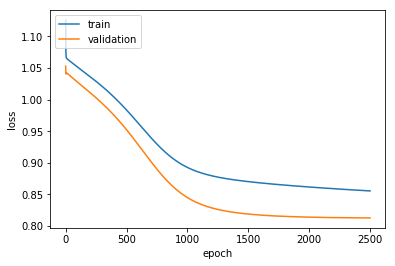

In [17]:
#without half time details loss
plt.plot(without_half_time_details_history.history['loss'])
plt.plot(without_half_time_details_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

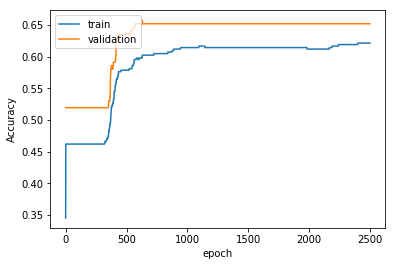

In [18]:
#without halftime details accuracy
plt.plot(without_half_time_details_history.history['acc'])
plt.plot(without_half_time_details_history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
#save the model for prediction
without_halftime_details_FTR_model_json = without_half_time_details_FTR_model.to_json()
with open("without_half_time_details_FTR_model.json", "w") as json_file:
    json_file.write(without_halftime_details_FTR_model_json)
# serialize weights to HDF5
without_half_time_details_FTR_model.save_weights("without_half_time_details_FTR_model.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
# # load without halftime json and create model
# json_file = open('without_half_time_details_FTR_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("without_half_time_details_FTR_model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# score = loaded_model.evaluate(Xtest_without_halftime, Ytest_without_halftime, verbose=2)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1] * 100)

Loaded model from disk
Test loss: 1.194789195919896
Test accuracy: 51.35135167353862


In [28]:

# model with half time statistics
X = fixtures[[0,1,2,3,4,5,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[14]]

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y.ix[:600,])
Ytrain = to_categorical(integer_encoded, num_classes=3)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest_with_halftime = X.ix[600:,]
test_int_encoded = label_encoder.fit_transform(Y.ix[600:,])
Ytest_with_halftime = to_categorical(test_int_encoded, num_classes=3)


/home/afadinsro/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/afadinsro/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/afadinsro/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
# def regression_model():
# 	model = Sequential()
# 	model.add(Dense(15, input_shape=(8,), kernel_initializer='normal', activation='relu'))
# 	#model.add(Dense(50, kernel_initializer='normal', activation='relu'))
# 	model.add(Dense(7, kernel_initializer='normal'))
# 	model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['accuracy'])
# 	return model

In [24]:
# estimator = KerasClassifier(build_fn=regression_model, nb_epoch=100, batch_size=300)#, verbose=0)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, Xtrain, Ytrain, cv=kfold)
# results
# print("Results: %.2f MSE" % (results.mean()))


In [25]:
# #second model
# model = Sequential()
# model.add(Dense(500, input_shape=(8,), kernel_initializer='normal', activation='tanh'))
# model.add(Dense(1000, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(100, kernel_initializer='normal', activation='tanh'))
# model.add(Dense(1, kernel_initializer='normal'))
# model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
# # train model
# history = model.fit(X_scaled, Y_scaled, epochs=100, batch_size=30, verbose=2, validation_split = 0.3)


In [33]:
model_with_half_time_FTR_statistics = Sequential()
model_with_half_time_FTR_statistics.add(Dense(200, input_dim=8, activation='relu'))
model_with_half_time_FTR_statistics.add(Dense(500, activation='relu'))
model_with_half_time_FTR_statistics.add(Dense(500, activation='relu'))
model_with_half_time_FTR_statistics.add(Dense(3, activation='softmax'))
model_with_half_time_FTR_statistics.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [34]:
model_with_half_time_statistics_history = model_with_half_time_FTR_statistics.fit(Xtrain, Ytrain, epochs=1000, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/1000
 - 0s - loss: 1.1131 - acc: 0.2857 - val_loss: 1.1224 - val_acc: 0.2210
Epoch 2/1000
 - 0s - loss: 1.1092 - acc: 0.2857 - val_loss: 1.1183 - val_acc: 0.2210
Epoch 3/1000
 - 0s - loss: 1.1053 - acc: 0.2833 - val_loss: 1.1142 - val_acc: 0.2265
Epoch 4/1000
 - 0s - loss: 1.1015 - acc: 0.2810 - val_loss: 1.1102 - val_acc: 0.2265
Epoch 5/1000
 - 0s - loss: 1.0978 - acc: 0.2810 - val_loss: 1.1063 - val_acc: 0.2265
Epoch 6/1000
 - 0s - loss: 1.0942 - acc: 0.2786 - val_loss: 1.1025 - val_acc: 0.2320
Epoch 7/1000
 - 0s - loss: 1.0907 - acc: 0.2881 - val_loss: 1.0988 - val_acc: 0.2431
Epoch 8/1000
 - 0s - loss: 1.0872 - acc: 0.3000 - val_loss: 1.0951 - val_acc: 0.2597
Epoch 9/1000
 - 0s - loss: 1.0838 - acc: 0.3310 - val_loss: 1.0915 - val_acc: 0.3039
Epoch 10/1000
 - 0s - loss: 1.0805 - acc: 0.3476 - val_loss: 1.0880 - val_acc: 0.3702
Epoch 11/1000
 - 0s - loss: 1.0772 - acc: 0.3762 - val_loss: 1.0845 - val_acc: 0.4254
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.9101 - acc: 0.6143 - val_loss: 0.9035 - val_acc: 0.6519
Epoch 97/1000
 - 0s - loss: 0.9088 - acc: 0.6143 - val_loss: 0.9021 - val_acc: 0.6519
Epoch 98/1000
 - 0s - loss: 0.9075 - acc: 0.6143 - val_loss: 0.9007 - val_acc: 0.6519
Epoch 99/1000
 - 0s - loss: 0.9062 - acc: 0.6143 - val_loss: 0.8993 - val_acc: 0.6519
Epoch 100/1000
 - 0s - loss: 0.9049 - acc: 0.6143 - val_loss: 0.8979 - val_acc: 0.6519
Epoch 101/1000
 - 0s - loss: 0.9036 - acc: 0.6143 - val_loss: 0.8965 - val_acc: 0.6519
Epoch 102/1000
 - 0s - loss: 0.9023 - acc: 0.6143 - val_loss: 0.8952 - val_acc: 0.6519
Epoch 103/1000
 - 0s - loss: 0.9011 - acc: 0.6143 - val_loss: 0.8938 - val_acc: 0.6519
Epoch 104/1000
 - 0s - loss: 0.8998 - acc: 0.6143 - val_loss: 0.8924 - val_acc: 0.6519
Epoch 105/1000
 - 0s - loss: 0.8986 - acc: 0.6143 - val_loss: 0.8911 - val_acc: 0.6519
Epoch 106/1000
 - 0s - loss: 0.8973 - acc: 0.6143 - val_loss: 0.8898 - val_acc: 0.6519
Epoch 107/1000
 - 0s - loss: 0.8961 - acc: 0.61

Epoch 191/1000
 - 0s - loss: 0.8194 - acc: 0.6310 - val_loss: 0.8066 - val_acc: 0.6519
Epoch 192/1000
 - 0s - loss: 0.8187 - acc: 0.6310 - val_loss: 0.8059 - val_acc: 0.6519
Epoch 193/1000
 - 0s - loss: 0.8181 - acc: 0.6310 - val_loss: 0.8053 - val_acc: 0.6519
Epoch 194/1000
 - 0s - loss: 0.8174 - acc: 0.6310 - val_loss: 0.8046 - val_acc: 0.6519
Epoch 195/1000
 - 0s - loss: 0.8168 - acc: 0.6310 - val_loss: 0.8039 - val_acc: 0.6519
Epoch 196/1000
 - 0s - loss: 0.8161 - acc: 0.6333 - val_loss: 0.8033 - val_acc: 0.6519
Epoch 197/1000
 - 0s - loss: 0.8155 - acc: 0.6333 - val_loss: 0.8026 - val_acc: 0.6519
Epoch 198/1000
 - 0s - loss: 0.8149 - acc: 0.6333 - val_loss: 0.8020 - val_acc: 0.6519
Epoch 199/1000
 - 0s - loss: 0.8143 - acc: 0.6333 - val_loss: 0.8013 - val_acc: 0.6519
Epoch 200/1000
 - 0s - loss: 0.8136 - acc: 0.6310 - val_loss: 0.8007 - val_acc: 0.6519
Epoch 201/1000
 - 0s - loss: 0.8130 - acc: 0.6310 - val_loss: 0.8001 - val_acc: 0.6519
Epoch 202/1000
 - 0s - loss: 0.8124 - acc: 

 - 0s - loss: 0.7743 - acc: 0.6357 - val_loss: 0.7630 - val_acc: 0.6630
Epoch 286/1000
 - 0s - loss: 0.7740 - acc: 0.6357 - val_loss: 0.7627 - val_acc: 0.6630
Epoch 287/1000
 - 0s - loss: 0.7736 - acc: 0.6357 - val_loss: 0.7624 - val_acc: 0.6630
Epoch 288/1000
 - 0s - loss: 0.7733 - acc: 0.6357 - val_loss: 0.7621 - val_acc: 0.6630
Epoch 289/1000
 - 0s - loss: 0.7729 - acc: 0.6381 - val_loss: 0.7618 - val_acc: 0.6685
Epoch 290/1000
 - 0s - loss: 0.7726 - acc: 0.6381 - val_loss: 0.7615 - val_acc: 0.6685
Epoch 291/1000
 - 0s - loss: 0.7723 - acc: 0.6381 - val_loss: 0.7612 - val_acc: 0.6685
Epoch 292/1000
 - 0s - loss: 0.7719 - acc: 0.6357 - val_loss: 0.7609 - val_acc: 0.6685
Epoch 293/1000
 - 0s - loss: 0.7716 - acc: 0.6357 - val_loss: 0.7607 - val_acc: 0.6685
Epoch 294/1000
 - 0s - loss: 0.7713 - acc: 0.6357 - val_loss: 0.7604 - val_acc: 0.6685
Epoch 295/1000
 - 0s - loss: 0.7709 - acc: 0.6357 - val_loss: 0.7601 - val_acc: 0.6685
Epoch 296/1000
 - 0s - loss: 0.7706 - acc: 0.6357 - val_lo

Epoch 380/1000
 - 0s - loss: 0.7488 - acc: 0.6524 - val_loss: 0.7441 - val_acc: 0.6740
Epoch 381/1000
 - 0s - loss: 0.7486 - acc: 0.6524 - val_loss: 0.7440 - val_acc: 0.6740
Epoch 382/1000
 - 0s - loss: 0.7484 - acc: 0.6524 - val_loss: 0.7439 - val_acc: 0.6740
Epoch 383/1000
 - 0s - loss: 0.7482 - acc: 0.6524 - val_loss: 0.7438 - val_acc: 0.6740
Epoch 384/1000
 - 0s - loss: 0.7480 - acc: 0.6500 - val_loss: 0.7436 - val_acc: 0.6740
Epoch 385/1000
 - 0s - loss: 0.7478 - acc: 0.6500 - val_loss: 0.7435 - val_acc: 0.6740
Epoch 386/1000
 - 0s - loss: 0.7476 - acc: 0.6500 - val_loss: 0.7434 - val_acc: 0.6740
Epoch 387/1000
 - 0s - loss: 0.7474 - acc: 0.6500 - val_loss: 0.7433 - val_acc: 0.6740
Epoch 388/1000
 - 0s - loss: 0.7472 - acc: 0.6548 - val_loss: 0.7432 - val_acc: 0.6740
Epoch 389/1000
 - 0s - loss: 0.7470 - acc: 0.6548 - val_loss: 0.7431 - val_acc: 0.6740
Epoch 390/1000
 - 0s - loss: 0.7468 - acc: 0.6548 - val_loss: 0.7430 - val_acc: 0.6740
Epoch 391/1000
 - 0s - loss: 0.7466 - acc: 

Epoch 475/1000
 - 0s - loss: 0.7328 - acc: 0.6667 - val_loss: 0.7370 - val_acc: 0.6906
Epoch 476/1000
 - 0s - loss: 0.7326 - acc: 0.6667 - val_loss: 0.7370 - val_acc: 0.6906
Epoch 477/1000
 - 0s - loss: 0.7325 - acc: 0.6643 - val_loss: 0.7369 - val_acc: 0.6906
Epoch 478/1000
 - 0s - loss: 0.7323 - acc: 0.6667 - val_loss: 0.7369 - val_acc: 0.6906
Epoch 479/1000
 - 0s - loss: 0.7322 - acc: 0.6667 - val_loss: 0.7369 - val_acc: 0.6906
Epoch 480/1000
 - 0s - loss: 0.7321 - acc: 0.6667 - val_loss: 0.7368 - val_acc: 0.6906
Epoch 481/1000
 - 0s - loss: 0.7319 - acc: 0.6643 - val_loss: 0.7368 - val_acc: 0.6906
Epoch 482/1000
 - 0s - loss: 0.7318 - acc: 0.6643 - val_loss: 0.7367 - val_acc: 0.6906
Epoch 483/1000
 - 0s - loss: 0.7317 - acc: 0.6643 - val_loss: 0.7367 - val_acc: 0.6906
Epoch 484/1000
 - 0s - loss: 0.7315 - acc: 0.6643 - val_loss: 0.7367 - val_acc: 0.6906
Epoch 485/1000
 - 0s - loss: 0.7314 - acc: 0.6643 - val_loss: 0.7366 - val_acc: 0.6906
Epoch 486/1000
 - 0s - loss: 0.7313 - acc: 

 - 0s - loss: 0.7215 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6519
Epoch 570/1000
 - 0s - loss: 0.7214 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6519
Epoch 571/1000
 - 0s - loss: 0.7213 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6519
Epoch 572/1000
 - 0s - loss: 0.7212 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6464
Epoch 573/1000
 - 0s - loss: 0.7211 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6464
Epoch 574/1000
 - 0s - loss: 0.7210 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6464
Epoch 575/1000
 - 0s - loss: 0.7209 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6464
Epoch 576/1000
 - 0s - loss: 0.7208 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6464
Epoch 577/1000
 - 0s - loss: 0.7207 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6464
Epoch 578/1000
 - 0s - loss: 0.7206 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6464
Epoch 579/1000
 - 0s - loss: 0.7205 - acc: 0.6738 - val_loss: 0.7354 - val_acc: 0.6464
Epoch 580/1000
 - 0s - loss: 0.7204 - acc: 0.6738 - val_lo

Epoch 664/1000
 - 0s - loss: 0.7126 - acc: 0.6714 - val_loss: 0.7363 - val_acc: 0.6298
Epoch 665/1000
 - 0s - loss: 0.7125 - acc: 0.6714 - val_loss: 0.7363 - val_acc: 0.6298
Epoch 666/1000
 - 0s - loss: 0.7124 - acc: 0.6714 - val_loss: 0.7363 - val_acc: 0.6298
Epoch 667/1000
 - 0s - loss: 0.7124 - acc: 0.6714 - val_loss: 0.7363 - val_acc: 0.6298
Epoch 668/1000
 - 0s - loss: 0.7123 - acc: 0.6714 - val_loss: 0.7363 - val_acc: 0.6298
Epoch 669/1000
 - 0s - loss: 0.7122 - acc: 0.6714 - val_loss: 0.7363 - val_acc: 0.6298
Epoch 670/1000
 - 0s - loss: 0.7121 - acc: 0.6738 - val_loss: 0.7364 - val_acc: 0.6298
Epoch 671/1000
 - 0s - loss: 0.7120 - acc: 0.6738 - val_loss: 0.7364 - val_acc: 0.6298
Epoch 672/1000
 - 0s - loss: 0.7119 - acc: 0.6714 - val_loss: 0.7364 - val_acc: 0.6298
Epoch 673/1000
 - 0s - loss: 0.7119 - acc: 0.6714 - val_loss: 0.7364 - val_acc: 0.6354
Epoch 674/1000
 - 0s - loss: 0.7118 - acc: 0.6714 - val_loss: 0.7364 - val_acc: 0.6354
Epoch 675/1000
 - 0s - loss: 0.7117 - acc: 

 - 0s - loss: 0.7055 - acc: 0.6738 - val_loss: 0.7382 - val_acc: 0.6298
Epoch 759/1000
 - 0s - loss: 0.7054 - acc: 0.6738 - val_loss: 0.7382 - val_acc: 0.6298
Epoch 760/1000
 - 0s - loss: 0.7053 - acc: 0.6738 - val_loss: 0.7382 - val_acc: 0.6298
Epoch 761/1000
 - 0s - loss: 0.7053 - acc: 0.6738 - val_loss: 0.7382 - val_acc: 0.6298
Epoch 762/1000
 - 0s - loss: 0.7052 - acc: 0.6738 - val_loss: 0.7383 - val_acc: 0.6298
Epoch 763/1000
 - 0s - loss: 0.7051 - acc: 0.6738 - val_loss: 0.7383 - val_acc: 0.6298
Epoch 764/1000
 - 0s - loss: 0.7051 - acc: 0.6738 - val_loss: 0.7383 - val_acc: 0.6298
Epoch 765/1000
 - 0s - loss: 0.7050 - acc: 0.6738 - val_loss: 0.7383 - val_acc: 0.6298
Epoch 766/1000
 - 0s - loss: 0.7049 - acc: 0.6738 - val_loss: 0.7384 - val_acc: 0.6298
Epoch 767/1000
 - 0s - loss: 0.7049 - acc: 0.6738 - val_loss: 0.7384 - val_acc: 0.6298
Epoch 768/1000
 - 0s - loss: 0.7048 - acc: 0.6738 - val_loss: 0.7384 - val_acc: 0.6298
Epoch 769/1000
 - 0s - loss: 0.7047 - acc: 0.6738 - val_lo

Epoch 853/1000
 - 0s - loss: 0.6993 - acc: 0.6762 - val_loss: 0.7406 - val_acc: 0.6243
Epoch 854/1000
 - 0s - loss: 0.6992 - acc: 0.6762 - val_loss: 0.7407 - val_acc: 0.6243
Epoch 855/1000
 - 0s - loss: 0.6992 - acc: 0.6762 - val_loss: 0.7407 - val_acc: 0.6243
Epoch 856/1000
 - 0s - loss: 0.6991 - acc: 0.6762 - val_loss: 0.7407 - val_acc: 0.6243
Epoch 857/1000
 - 0s - loss: 0.6991 - acc: 0.6762 - val_loss: 0.7408 - val_acc: 0.6243
Epoch 858/1000
 - 0s - loss: 0.6990 - acc: 0.6762 - val_loss: 0.7408 - val_acc: 0.6243
Epoch 859/1000
 - 0s - loss: 0.6989 - acc: 0.6762 - val_loss: 0.7408 - val_acc: 0.6188
Epoch 860/1000
 - 0s - loss: 0.6989 - acc: 0.6762 - val_loss: 0.7408 - val_acc: 0.6188
Epoch 861/1000
 - 0s - loss: 0.6988 - acc: 0.6762 - val_loss: 0.7409 - val_acc: 0.6188
Epoch 862/1000
 - 0s - loss: 0.6988 - acc: 0.6762 - val_loss: 0.7409 - val_acc: 0.6188
Epoch 863/1000
 - 0s - loss: 0.6987 - acc: 0.6762 - val_loss: 0.7409 - val_acc: 0.6188
Epoch 864/1000
 - 0s - loss: 0.6986 - acc: 

 - 0s - loss: 0.6939 - acc: 0.6810 - val_loss: 0.7431 - val_acc: 0.6298
Epoch 948/1000
 - 0s - loss: 0.6938 - acc: 0.6833 - val_loss: 0.7431 - val_acc: 0.6298
Epoch 949/1000
 - 0s - loss: 0.6937 - acc: 0.6833 - val_loss: 0.7431 - val_acc: 0.6354
Epoch 950/1000
 - 0s - loss: 0.6937 - acc: 0.6833 - val_loss: 0.7431 - val_acc: 0.6354
Epoch 951/1000
 - 0s - loss: 0.6936 - acc: 0.6833 - val_loss: 0.7432 - val_acc: 0.6354
Epoch 952/1000
 - 0s - loss: 0.6936 - acc: 0.6833 - val_loss: 0.7432 - val_acc: 0.6354
Epoch 953/1000
 - 0s - loss: 0.6935 - acc: 0.6833 - val_loss: 0.7432 - val_acc: 0.6354
Epoch 954/1000
 - 0s - loss: 0.6935 - acc: 0.6833 - val_loss: 0.7432 - val_acc: 0.6354
Epoch 955/1000
 - 0s - loss: 0.6934 - acc: 0.6833 - val_loss: 0.7433 - val_acc: 0.6354
Epoch 956/1000
 - 0s - loss: 0.6934 - acc: 0.6833 - val_loss: 0.7433 - val_acc: 0.6354
Epoch 957/1000
 - 0s - loss: 0.6933 - acc: 0.6833 - val_loss: 0.7433 - val_acc: 0.6354
Epoch 958/1000
 - 0s - loss: 0.6933 - acc: 0.6833 - val_lo

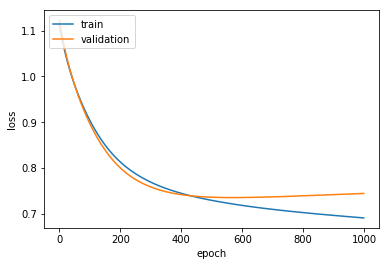

In [35]:
plt.plot(model_with_half_time_statistics_history.history['loss'])
plt.plot(model_with_half_time_statistics_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

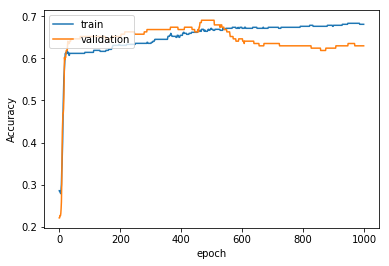

In [36]:
plt.plot(model_with_half_time_statistics_history.history['acc'])
plt.plot(model_with_half_time_statistics_history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
#save the model for prediction
model_with_half_time_FTR_statistics_json = model_with_half_time_FTR_statistics.to_json()
with open("with_halftime_details_FTR_model.json", "w") as json_file:
    json_file.write(model_with_half_time_FTR_statistics_json)
# serialize weights to HDF5
model_with_half_time_FTR_statistics.save_weights("with_halftime_details_FTR_model.h5")
print("Saved model to disk")

Saved model to disk


In [38]:
# # load with halftime json and create model
# json_file = open('with_halftime_details_FTR_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("with_halftime_details_FTR_model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# score = loaded_model.evaluate(Xtest_with_halftime, Ytest_with_halftime, verbose=2)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1] * 100)

Loaded model from disk
Test loss: 1.6067411008181873
Test accuracy: 51.35135167353862
